In [5]:
import tensorflow as tf
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# 第十章 Keras人工神经网络简介

# 第一部分

第一部分介绍人工神经网络与今天广泛使用的多层感知机<br>
第二部分研究如何用流行的Keras API实现神经网络

## 从生物神经元到人工神经元

人工神经网络首次由神经生物学家Warren McCulloch和数学家Walter Pitts于1943年提出。
人工神经网络有很大的发展前景，主要原因有：<br>
1) 当今世界是大数据的时代，有大量的数据可供神经网络使用，并且ANNs强大的解决问题的能力。<br>
2) 计算力的巨大提升，根据摩尔定律每2年翻一倍，同时也是由于游戏行业的发展，带动了GPU等的生产和进步，同时云计算也起到很大的作用。<br>
3) 在实践中，ANNs的一些理论局限性被证明是良性的。

McCulloch和Pitts提出了一个非常简单的生物神经元模型，后来被称为人工神经元:它有一个或多个二进制(开/关)输入和一个二进制输出。当超过一定数量的输入被激活时，人工神经元就会激活它的输出。在他们的论文中，他们展示了即使有这样一个简化的模型，也可以建立一个人工神经元网络来计算任何你想要的逻辑命题。为了了解这样的网络是如何工作的，让我们构建一些执行各种逻辑计算的ANN(见图)，在这里我们假设一个神经元在至少两个输入是活跃的时候被激活。

![ytb](img/10-3.jpg)

### 感知机

感知机是一种最简单的人工神经网络，由Frank Rosenblatt于1957年发明。
感知机基于叫作阈值逻辑单元(TLU)的人工神经元，输入和输出都是数字，每个输入都有一个权重。TLU计算输入的加权和$(z=w_1x_1+w_2x_2+\dots+w_nx_n=\pmb{X}^T\pmb{W})$，最后经过阶跃函数得到输出。用公式表示如下：
$h_W(\pmb{X})=step(z)$, 其中 $z=\pmb{X}^T\pmb{W}$
<br>
阶跃函数通常是Heaviside阶跃函数（也叫单位阶跃函数），或是sign函数。
<br>
Heaviside阶跃函数：大于等于0返回1，否则返回0
<br>
sign函数：大于0返回1，小于0返回-1，等于0返回0
<br>
$$
heaviside(z) =
\begin{cases}
0 & \text{if z<0}  \\
1 & \text{if z>0}
\end{cases}
$$
<br>
$$
sgn(z) =
\begin{cases}
-1 & \text{if z<0}  \\
0 & \text{if z=0}  \\
1 & \text{if z>0}
\end{cases}
$$
![ytb](img/10-4.jpg)

如果当前层的所有神经元与前一层每个神经元都有连接，则称该层为全连接层(fully connected layer，也叫dense layer)。全连接层计算公式如下：
$$h_{W,b}(X)=\phi(XW+b)$$
其中：
<br>
X：表示输入特征，每行一个样本，每列一特征
<br>
W：表示权重矩阵
<br>
b：表示偏置向量
<br>
𝜙：表示激活函数，如果是人工神经元就是阶跃函数

sklearn中提供了Perceptron类,该类实现了单个的TLU网络，下面展示在鸢尾植物数据集中：

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target==0).astype(np.int)
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
# max_iter是最大的迭代次数
# tol 阈值 判断迭代是否收敛或者是否满足精度的要求
# random_state 相当于随机数种子random.seed()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
#help(Perceptron)

In [7]:
y_pred = per_clf.predict([[2, 1]])
y_pred

array([0])

In [105]:
y_pred_2 = per_clf.predict([[2, 0.5]])
y_pred_2

array([1])

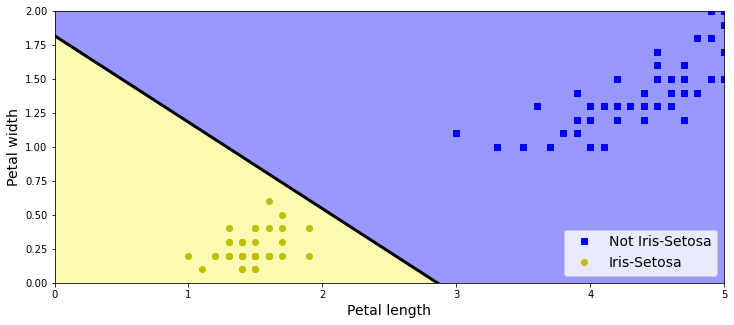

In [9]:
a = - per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = - per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
 
plt.figure(figsize=(12, 5))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
 
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

- 如上输出所示为感知机的决策边界。
- 感知机有一个致命的缺点，就是无法解决机器学习中很简单的异或问题。也就是因为研究者发现感知机连这么简单的异或问题都无法解决，有大部分研究者开始放弃对神经网络的研究，纷纷将目光转向其它研究领域。

和梯度下降差不多,实际上sklearn的Perceptron等于SGDClassifier(loss=“perceptron”,learning_rate=“constant”, eta0=1,penalty=None)（随机梯度下降分类器）.在简单问题上其实用逻辑回归更好,感知机是一个基于硬阈值的预测,一但你没达到那个阈值可能这个神经元就会把值给变成0,就啥都没有了.但是在复杂问题上,逻辑回归可能并不那么准确,我们又把目光放到了感知机上,其实感知机的层层堆叠形成所谓的多层感知机就可以处理很多复杂问题了.

![ytb](pic/3.png)

### 多层感知机与反向传播

![ytm](img/10-7.jpg)

以上提到的感知机无法解决异或问题是针对单层感知机。而多层感知机可以解决异或问题。
- 多层感知机由输入层、多个隐藏层和输出层组成，除了输出层，其它层神经元都有一个偏置，并与下一层是全连接的。由于信息的流动是单向的，即从输入层流向输出层，因此这种多层感知机也叫作前馈神经网络。
- 深度神经网络：具有大量隐藏层的人工神经网络。
- 多年来，人们一直在研究如何训练多层感知机。直到1986年，由David Rumelhart、Geoffrey Hinton和Ronald Williams一起发表了著名的具有突破性的关于反向传播算法的文章。
- 梯度下降算法：神经网络中有两个通路，加权求和的信息向前传播，预测值与真实值之间的误差（损失函数）的梯度反向（向后）传播，然后根据梯度更新参数，不断重复前向传播和反向传播，直到网络收敛。
- 一般情况下，权重参数W进行随机初始化，偏置b一般进行0初始化。
- 由于阶跃函数在反向传播过程中无法求导，因此常常被替换成更常用的激活函数。
- 为什么要用激活函数？增加更多非线性。对于多层全连接神经网络，如果每层都不使用激活函数，则输出y=(((XW1)W2)...Wn，即相当于y=XW1W2...Wn，令W=W1W2...Wn，则该网络就相当于单层网络。因此，如果不使用激活函数，无论多少层的神经网络还是相当于单层神经网络。反过来说，任何足够大的具有非线性激活的神经网络理论上能够拟合任何连接函数。

常用的激活函数如下：
- Sigmoid函数：f(x) = 1/(1+exp(-x))，函数是S形曲线，在实数定义域内连续且可导，值域(0,1)。因为函数输出分布在0和1之间，所以输出可以被看作是概率。<br>
- 双曲正切函数：tanh(x) = (exp(x) - exp(-x)) / ( exp(x) + exp(-x)，函数是S形曲线，在实数定义域内连续且可导，值域(-1,1)。因此，在训练刚开始时输出更可能在0附近，有利于模型的收敛。<br>
- ReLU函数：relu(x) = max(0,x)，实数定义域内连续，但在0处不可微，但在实际应用中如果碰到0处求导的情况，默认直接让其导数等于0，这样就解决了0处不可导的问题。ReLU用于激活函数的优点是计算导数简单，如果X大于0，导数为1，如果X小于0，导数为0。<br>
- softplus：ReLU函数的变体，softplus(x)=log(1+exp(x))。<br>
- softmax：常常用于多类别分类任务

原因很简单,如果我们不用激活函数,无论你堆叠多少层,多深的网络,最终的计算也只是简单的线性计算,并没有像生物神经元那样有一个"激活"的作用.而在最后一层,我们通常是得到我们的输出结果,如果继续用sigmod函数就没有这么直观可以表达我们的输出,所以一般在线性任务中我们最后的输出层可以用一个Logistic激活,在多分类任务中我们可以用Softmax.而在反向传播中我们是通过一个LOSS function损失函数来计算我们的梯度

![test](image/7.png)

![test](image/9.png)

![test](image/8.png)

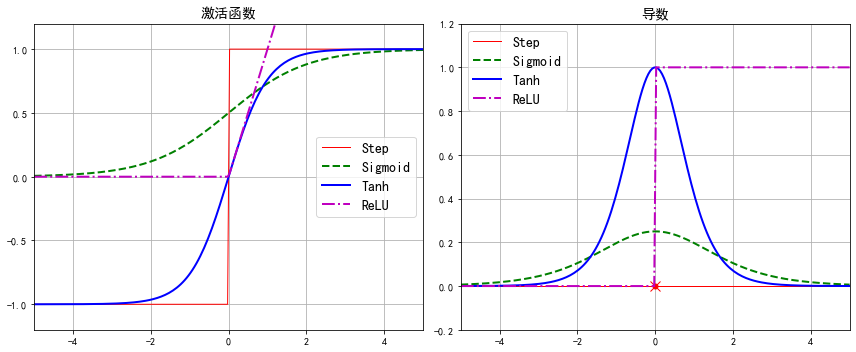

In [8]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.maximum(0,x)
def derivative(f, x, eps=0.000001):
    return (f(x + eps) - f(x - eps))/(2 * eps)
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(12,5))
 
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")     # 阶跃函数
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid") # Sigmoid函数
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")     # tanh函数
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")       # ReLU函数
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("激活函数", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])
 
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.title(r"导数", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
 
plt.tight_layout()
plt.show()

# 第二部分

## 使用Keras接口实现MLP

- Keras是一个用于创建、训练、评估和运行各类神经网络的高级API。官网：https://keras.io/

- Keras由François Chollet于2015年作为开源项目发布，作为高级API，目前后端支持调用TensorFlow、Microsoft Cognitive Toolkit(CNTK)和Theano。

- 在TensorFlow2中也对Keras进行了实现，即tf.keras，同时加入了一些原生Keras没有的特性，例如tf.keras支持TensorFlowr的Data API，因此tf.keras后端只支持TensorFlow。

- 除了Keras、TensorFlow等深度学习库外，PyTorch也是非常流行，其源于Facebook，PyTorch的API非常的类似于Keras。而这些API都受到了Python库sklearn和Chainer的启发。

- TensorFlow 1.x存在许多缺点，很难入门，易用性不好，导致2018年PyTorch大火。TensorFlow2放弃对1.x的延续或继承而进行了重写，进行了重大的调整，并且采用Keras为官方高级API，并精简和清理了大量冗余的API。同样PyTorch1.0解决了PyTorch的主要不足。

### 使用顺序API构建图像分类器

<font face="宋体">
Fashion MNIST数据集：与MNIST类似，共有7万张灰度图像，每张图像大小28*28，总共10个类别，每张图像代表不同的时尚用品。因此Fashion MNIST数据集相比于MNIST比较复杂，利用普通的线性模型在MNIST数据集上能达到92%的准确率，而在Fashion MNIST上只能达到83%。
</font>

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()
for i in (X_train_full, y_train_full, X_test, y_test):
    print(i.shape, i.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [14]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 # 将数据归一化到0.0到1.0之间
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0
 
for i in (X_train, y_train, X_valid, y_valid, X_test, y_test):
    print(i.shape, i.dtype)

(55000, 28, 28) float64
(55000,) uint8
(5000, 28, 28) float64
(5000,) uint8
(10000, 28, 28) float64
(10000,) uint8


In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

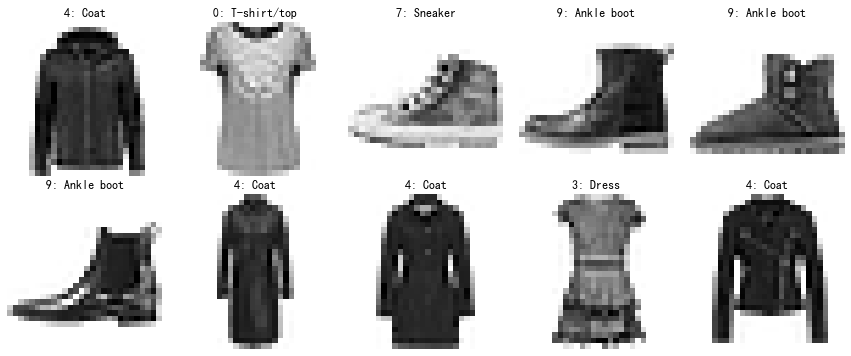

In [16]:
# 查看前10张样本图像
plt.figure(figsize=(12,5))

for i in range(10):
    plt.subplot(2,5,i+1) 
    plt.imshow(X_train[i], cmap="binary")
    plt.axis('off')
    plt.title(str(y_train[i])+": "+class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))  # 对输入数据进行X.reshape(-1,1)操作 折叠成一维数组
model.add(tf.keras.layers.Dense(300, activation="relu")) # "relu"等价于tf.keras.activations.relu
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
 
tf.keras.backend.clear_session()#使用tf.keras.backend.clear_session()来清除模型占用内存
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [107]:
#help(tf.keras.models.Sequential)

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


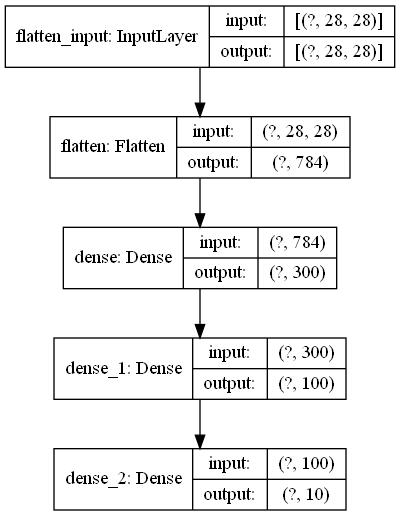

In [22]:
tf.keras.utils.plot_model(model, "my_mnist_model.png",show_shapes=True)

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [24]:
model.get_layer(hidden1.name) is hidden1

True

In [25]:
weights, biases = hidden1.get_weights()
print(weights.shape)
print(weights)

(784, 300)
[[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]


In [26]:
print(biases.shape)
print(biases)

(300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


如上输出所示，权重W进行了随机初始化，而偏置b进行了全0初始化。如果想指定初始化方法，可以使用超参数kernel_initializer和bias_initializer进行指定。

In [27]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])#交叉熵损失函数

如上过程对模型进行编译，主要指定所使用的损失函数，优化器和衡量指标。<br>
loss使用sparse_categorical_crossentropy是因为标签是稀疏的，每个样本有0-9之间的一个数字作为标签；如果非one_hot格式的标签，则需要使用categorical_crossentropy。可以使用tf.keras.utils.to_categorical()函数转换成one_hot编码。<br>
优化器使用sgd，即随机梯度下降，默认学习率为0.01

![test](image/10.png)

In [28]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4392 - accuracy: 0.8457 - val_loss: 0.5358 - val_accuracy: 0.7976
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4126 - accuracy: 0.8564 - val_loss: 0.3921 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3939 - accuracy: 0.8618 - val_loss: 0.3750 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3753 - accuracy: 0.8676 - val_loss: 0.3694 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3633 - accuracy: 0.8711 - val_loss: 0.3616 - val_accuracy:

- mode.fit()函数中参数epochs默认值为1，epochs被定义为向前和向后传播中所有批次的单次训练迭代。这意味着1个周期是整个输入数据的单次向前和向后传递。简单说，epochs指的就是训练过程中数据将被“轮”多少次
- 默认batch_size为32，故55000/32=1718.75。一次训练所选取的样本数
- 也可以通过指定validation_split=0.1指定将训练集中10%的数据用于验证，而不用再单独传入验证集。

In [29]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [30]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
history.history

{'loss': [0.7236781120300293,
  0.4842923879623413,
  0.43919143080711365,
  0.4126169979572296,
  0.3938888907432556,
  0.3752559721469879,
  0.3633424639701843,
  0.35175150632858276,
  0.3415127098560333,
  0.3320985734462738,
  0.32418662309646606,
  0.3150677978992462,
  0.30825161933898926,
  0.3021922707557678,
  0.2947065234184265,
  0.2891533672809601,
  0.28412577509880066,
  0.27801015973091125,
  0.27299755811691284,
  0.2674311399459839,
  0.2624906301498413,
  0.2575952112674713,
  0.2534756660461426,
  0.24861761927604675,
  0.24438467621803284,
  0.24058039486408234,
  0.23621168732643127,
  0.23292773962020874,
  0.22821521759033203,
  0.22499220073223114],
 'accuracy': [0.7644181847572327,
  0.8317999839782715,
  0.8456727266311646,
  0.8564181923866272,
  0.8618363738059998,
  0.867618203163147,
  0.8711272478103638,
  0.8750545382499695,
  0.8785818219184875,
  0.8824909329414368,
  0.883400022983551,
  0.8865818381309509,
  0.8889272809028625,
  0.8918363451957703,

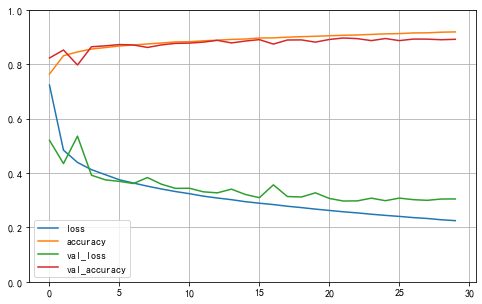

In [108]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 824us/step - loss: 0.3382 - accuracy: 0.8808


[0.3381699323654175, 0.8808000087738037]

+ 如上输出所示，输出为一个列表，第一个值代表损失，第二个值代表准确率。
+ 下面就可以用模型进行预测了：

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

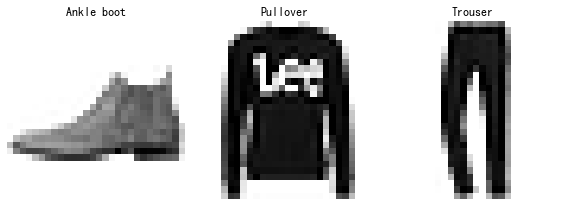

In [39]:
plt.figure(figsize=(8, 5))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.tight_layout()
plt.show()

### 使用顺序API构建回归MLP

使用加利福尼亚房价数据集(california_hosing)进行分析：

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler#作用：去均值和方差归一化。
 
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
 
for i in (X_train, X_valid, X_test, y_train, y_valid, y_test):
    print(i.shape)

(11610, 8)
(3870, 8)
(5160, 8)
(11610,)
(3870,)
(5160,)


In [41]:
np.random.seed(42)
tf.random.set_seed(42)
# 构建模型结构
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu",input_shape=(X_train.shape[1:])),#神经元少，防止过拟合
    tf.keras.layers.Dense(1)#只预测一个值而不是一个类别
])
# 编译模型
model.compile(loss="mean_squared_error",optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))#损失函数为均方误差 优化器为SGD
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 817us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 563us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 570us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 572us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 553us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 588us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 572us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 576us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 544us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 556us/step - loss: 0.487

In [43]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 448us/step - loss: 0.4212


0.42117786407470703

In [44]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
print(y_pred)

[[0.38856643]
 [1.6792021 ]
 [3.1022797 ]
 [2.6324043 ]
 [2.6914022 ]]


In [45]:
y_test[:5]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

如上输出所示，预测结果与真实结果还是有一定的差异。

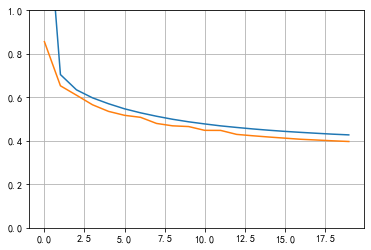

In [37]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
# 构建模型结构
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu",input_shape=(X_train.shape[1:])),#神经元少，防止过拟合
    tf.keras.layers.Dense(10, activation="relu"),#神经元少，防止过拟合
    tf.keras.layers.Dense(1)#只预测一个值而不是一个类别
])
# 编译模型
model_2.compile(loss="mean_squared_error",optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))#损失函数为均方误差 优化器为SGD
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [47]:
history_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.9581 - val_loss: 1.1545
Epoch 2/20
363/363 [==============================] - 0s 606us/step - loss: 0.8396 - val_loss: 0.6983
Epoch 3/20
363/363 [==============================] - 0s 651us/step - loss: 0.6552 - val_loss: 0.6194
Epoch 4/20
363/363 [==============================] - 0s 614us/step - loss: 0.5774 - val_loss: 0.5352
Epoch 5/20
363/363 [==============================] - 0s 598us/step - loss: 0.5302 - val_loss: 0.4934
Epoch 6/20
363/363 [==============================] - 0s 599us/step - loss: 0.4977 - val_loss: 0.4707
Epoch 7/20
363/363 [==============================] - 0s 610us/step - loss: 0.4748 - val_loss: 0.4641
Epoch 8/20
363/363 [==============================] - 0s 609us/step - loss: 0.4584 - val_loss: 0.4349
Epoch 9/20
363/363 [==============================] - 0s 609us/step - loss: 0.4454 - val_loss: 0.4270
Epoch 10/20
363/363 [==============================] - 0s 577us/step - loss: 0.4354 

In [49]:
mse_test_2 = model_2.evaluate(X_test, y_test)
mse_test_2

162/162 [==============================] - 0s 476us/step - loss: 0.3860


0.3860360085964203

In [50]:
X_new = X_test[:5]
y_pred_2 = model_2.predict(X_new)
print(y_pred_2)

[[0.75258327]
 [1.846357  ]
 [3.537632  ]
 [2.6756773 ]
 [2.737914  ]]


In [51]:
y_test[:5]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

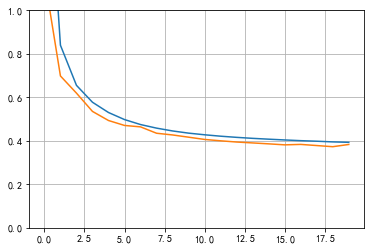

In [48]:
plt.plot(pd.DataFrame(history_2.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [52]:
# 构建模型结构
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu",input_shape=(X_train.shape[1:])),#神经元少，防止过拟合
    tf.keras.layers.Dense(10, activation="relu"),#神经元少，防止过拟合
    tf.keras.layers.Dense(1)#只预测一个值而不是一个类别
])
# 编译模型
model_3.compile(loss="mean_squared_error",optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))#损失函数为均方误差 优化器为SGD
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [53]:
history_3 = model_3.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 0s 856us/step - loss: 2.5471 - val_loss: 1.1923
Epoch 2/40
363/363 [==============================] - 0s 602us/step - loss: 0.8773 - val_loss: 0.7249
Epoch 3/40
363/363 [==============================] - 0s 595us/step - loss: 0.6504 - val_loss: 0.7214
Epoch 4/40
363/363 [==============================] - 0s 631us/step - loss: 0.5845 - val_loss: 0.5836
Epoch 5/40
363/363 [==============================] - 0s 609us/step - loss: 0.5462 - val_loss: 0.5175
Epoch 6/40
363/363 [==============================] - 0s 568us/step - loss: 0.5161 - val_loss: 0.4811
Epoch 7/40
363/363 [==============================] - 0s 602us/step - loss: 0.4932 - val_loss: 0.4595
Epoch 8/40
363/363 [==============================] - 0s 606us/step - loss: 0.4741 - val_loss: 0.4392
Epoch 9/40
363/363 [==============================] - 0s 640us/step - loss: 0.4589 - val_loss: 0.4235
Epoch 10/40
363/363 [==============================] - 0s 632us/step - loss: 0.446

In [54]:
mse_test_3 = model_3.evaluate(X_test, y_test)
mse_test_3

162/162 [==============================] - 0s 463us/step - loss: 0.3695


0.36953023076057434

In [55]:
X_new = X_test[:5]
y_pred_3 = model_3.predict(X_new)
print(y_pred_3)

[[0.7914079]
 [1.6241574]
 [3.8862863]
 [2.7986612]
 [2.809052 ]]


In [56]:
y_test[:5]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

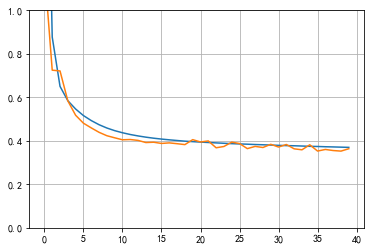

In [57]:
plt.plot(pd.DataFrame(history_3.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### 使用函数式API构建复杂模型

In [58]:
np.random.seed(42)
tf.random.set_seed(42)
 
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_) # 通过类似函数的方式转入input_，因此叫函数式API
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)
 
model = tf.keras.models.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_12[0][0]        

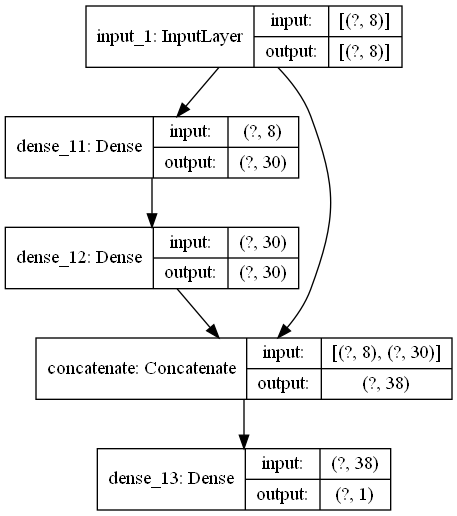

In [59]:
tf.keras.utils.plot_model(model, "wide_deep_model.png", show_shapes=True)

In [60]:
# 模型编译
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 892us/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 637us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 617us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 643us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 651us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 627us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 656us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 652us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 623us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 700us/step - loss: 0.465

In [61]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 411us/step - loss: 0.4032


0.4031672477722168

In [63]:
y_pred = model.predict(X_new)
y_pred

array([[0.47010726],
       [1.8735044 ],
       [3.3798232 ],
       [2.7344115 ],
       [2.8069582 ]], dtype=float32)

In [66]:
np.random.seed(42)
tf.random.set_seed(42)
 
input_A = tf.keras.layers.Input(shape=[5],name="wide_input")
input_B = tf.keras.layers.Input(shape=[6],name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A, input_B], outputs=[output])
 
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           930         dense_14[0][0]                   
_______________________________________________________________________________________

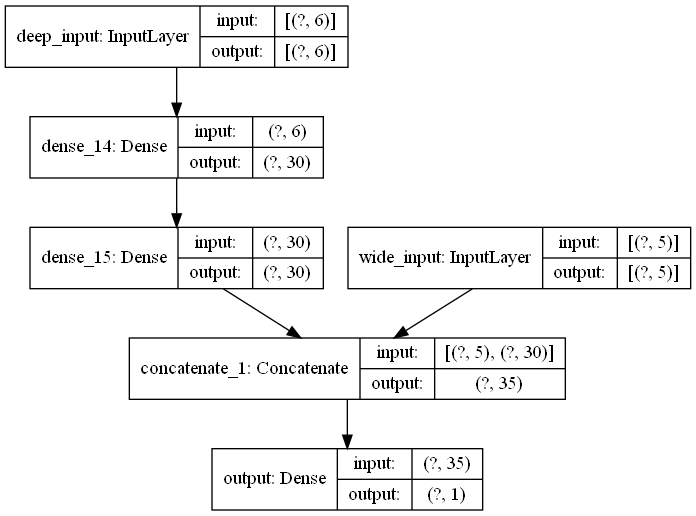

In [67]:
tf.keras.utils.plot_model(model, "wide_deep_model2.png",show_shapes=True)

In [68]:
model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
 
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
 
history = model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))

Epoch 1/20
363/363 [==============================] - 0s 899us/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 620us/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 648us/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 644us/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 681us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 661us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 642us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 664us/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 642us/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 666us/step - loss: 0.464

In [69]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
mse_test

162/162 [==============================] - 0s 456us/step - loss: 0.4219


0.42188265919685364

In [71]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[0.30591205],
       [1.9540672 ],
       [3.4426105 ]], dtype=float32)

In [72]:
np.random.seed(42)
tf.random.set_seed(42)
 
input_A = tf.keras.layers.Input(shape=[5],name="wide_input")
input_B = tf.keras.layers.Input(shape=[6],name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
aux_output = tf.keras.layers.Dense(1,name="aux_output")(hidden2)
model = tf.keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
 
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           930         dense_16[0][0]                   
_______________________________________________________________________________________

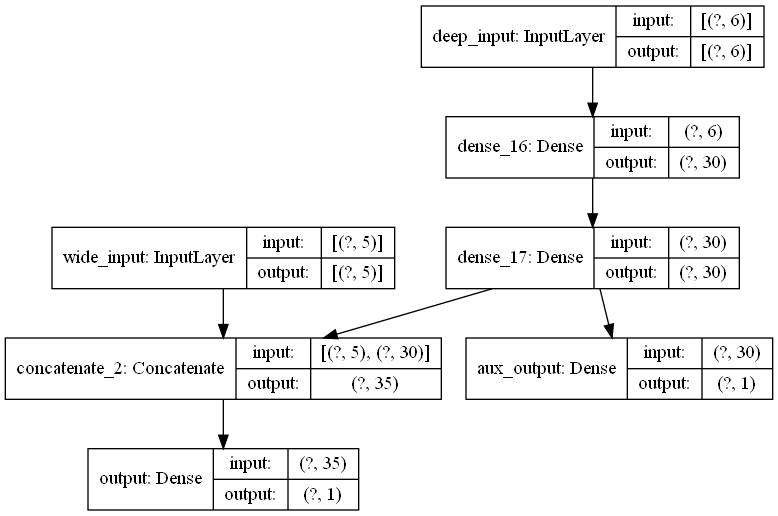

In [73]:
tf.keras.utils.plot_model(model, "wide_deep_model_aux_output.png",show_shapes=True)

In [74]:
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))#给主要输出赋更大的权重
history = model.fit([X_train_A, X_train_B],[y_train, y_train],epochs=20,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.1365 - output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 795us/step - loss: 0.8905 - output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 815us/step - loss: 0.7429 - output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 809us/step - loss: 0.6771 - output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 798us/step - loss: 0.6381 - output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss: 1.2177 - val_output_loss: 0.5194 - 

In [76]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])
total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 582us/step - loss: 0.4668 - output_loss: 0.4178 - aux_output_loss: 0.9082


(0.46683046221733093, 0.4177945852279663, 0.9081541299819946)

In [78]:
y_pred_main, y_pred_aux = model.predict([X_new_A,X_new_B])
print(y_pred_main)
print()
print(y_pred_aux)

[[0.26762426]
 [1.9807628 ]
 [3.3396287 ]]

[[0.9593649]
 [1.9240992]
 [2.5152814]]


### 使用子类API构建动态模型

+ 无论是连续性API还是函数式API都是声明式的，即事先声明使用哪些层，层与层之间怎样连接，并且喂入数据后开始训练和预测推断。这样做的优点是：模型易于保存、克隆和分享，结构易于可视化和分析，易于检查形状(shape)和类型，易于调试等等。缺点是模型是静态的。

+ 对于其它类型的模型，例如包括环状结构、条件分支以及其它动态行为等等，这种情况就需要子类API来完成：

In [79]:
class WideAndDeepModel(tf.keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):#将一个可变的关键字参数的字典传给函数实参
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation="relu")

In [80]:
model.compile(loss="mse",loss_weights=[0.9,0.1],optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A,X_train_B),(y_train,y_train),epochs=20,validation_data=((X_valid_A,X_valid_B),(y_valid,y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_

In [81]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A,X_test_B),(y_test,y_test))
for i in (total_loss, main_loss, aux_loss):
    print(i)

162/162 [==============================] - 0s 936us/step - loss: 0.4939 - output_1_loss: 0.4455 - output_2_loss: 0.9296
0.4939037561416626
0.4454963207244873
0.9295728802680969


In [83]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
for i in (y_pred_main,"", y_pred_aux):
    print(i)

[[0.36133322]
 [1.8392309 ]
 [3.2579417 ]]

[[1.1205194]
 [1.9981728]
 [2.641951 ]]


In [84]:
model.summary()

Model: "wide_and_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             multiple                  210       
_________________________________________________________________
dense_19 (Dense)             multiple                  930       
_________________________________________________________________
dense_20 (Dense)             multiple                  36        
_________________________________________________________________
dense_21 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


+ 如上输出所示，使用子类API构建的模型summary()方法输出结果很简单，没有具体的输出形状信息。
+ 子类API这种方法在运行前Keras不会对其进行检查，因此很容易出错。因此，除非特别需要，否则一般情况下建议使用连续性API或函数式API。

### 保存还原模型与回调函数

对于通过连续性API或函数式API构建的模型，可以使用save()方法保存模型，load_model()方法加载模型：

In [86]:
np.random.seed(42)
tf.random.set_seed(42)
 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu",input_shape=[8]),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 0s 850us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 614us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 638us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 613us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 639us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 637us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 647us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 599us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 588us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 645us/step - loss: 0.447

In [59]:
#以HDF5格式保存模型，包括模型结构、每层超参数、参数（权重和偏置）、优化器等：
model.save("my_keras_model.h5")

In [89]:
model_loaded = tf.keras.models.load_model("my_keras_model.h5")
model_loaded.predict(X_new)

array([[0.65925455],
       [1.73154   ],
       [4.2763567 ],
       [2.7297916 ],
       [2.8395226 ]], dtype=float32)

In [90]:
#如果只想保存参数，可以使用save_weights()，加载参数使用load_weights()：
#只加载保存的参数时，需要保证模型的结构能与保存的参数对上，否则会出错。
model.save_weights("my_keras_weights.ckpt")
model_loaded_weights = model.load_weights("my_keras_weights.ckpt")

在我们使用fit()函数对模型开始训练之后，那么整个训练的过程将对使用者完全透明，我们无法了解到训练过程中模型在每轮训练时的状态，我们能做的只能是预先设定好训练的轮数和学习率的初始值，这样将会造成一下两种情况：
- 由于追求模型对训练集的拟合程度（充分训练模型)，我们一般会设定一个比较大的轮数，这就会造成过拟合的情况。我们无法在模型效果达到比较好的状态时提前结束训练。
- 当损失函数达到一个极小值点的时候，模型可能会卡在该点无法继续寻找最小值点，这时缩小或放大（2倍或10倍）学习率会起到很好的效果。但是我们无法在训练的过程中修改学习率的大小。

为了避免以上情况的出现，我们可以使用回调函数来解决。一句话概括回调函数：回调函数就是可以在模型训练的不同时间点被触发的函数，具有具有一下两个方面的作用：
- 访问模型当前的状态（损失函数大小，准确率等）
- 采取适当的行动：中断训练、保存模型、改变模型的状态等。

回调函数：
- fit()方法可以传入参数callbacks，使得Keras在训练的开始和结束调用、在每个epoch开始和结束调用、甚至在对每个batch处理前后调用。
- ModelCheckpoint在训练时定期不断保存模型，默认是每个epoch结束保存一次：

keras.callbacks.ModelCheckpoint(filepath, 
								monitor='val_loss', 
								verbose=0, 
								save_best_only=False, 
								save_weights_only=False, 
								mode='auto', 
								period=1)
- filename：字符串，保存模型的路径，filepath可以是格式化的字符串，里面的占位符将会被epoch值和传入on_epoch_end的logs关键字所填入。
- monitor：需要监视的值，通常为：val_acc 或 val_loss 或 acc 或 loss
- verbose：信息展示模式，0或1。为1表示输出epoch模型保存信息，默认为0表示不输出该信息
- save_best_only：当设置为True时，将只保存在验证集上性能最好的模型,此时就不用担心由于训练时间太长而导致过拟合的问题
- mode：‘auto’，‘min’，‘max’之一，在save_best_only=True时决定性能最佳模型的评判准则，例如，当监测值为val_acc时，模式应为max，当检测值为val_loss时，模式应为min。在auto模式下，评价准则由被监测值的名字自动推断。
- save_weights_only：若设置为True，则只保存模型权重，否则将保存整个模型（包括模型结构，配置信息等）
- period：CheckPoint之间的间隔的epoch数

In [92]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)#该回调函数将在每个epoch后保存模型到filepath
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])
model = tf.keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/10
363/363 [==============================] - 0s 643us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/10
363/363 [==============================] - 0s 694us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/10
363/363 [==============================] - 0s 645us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/10
363/363 [==============================] - 0s 661us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/10
363/363 [==============================] - 0s 658us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/10
363/363 [==============================] - 0s 636us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/10
363/363 [==============================] - 0s 675us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/10
363/363 [==============================] - 0s 693us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/10
162/162 [==============================] - 0s 443us/step - loss: 0.3951


0.3950933814048767

EarlyStopping回调函数用于当模型性能不再改变时提前停止训练。可以同时使用多个回调函数：
- monitor: 监控的数据接口，有’acc’,’val_acc’,’loss’,’val_loss’等等。正常情况下如果有验证集，就用’val_acc’或者’val_loss’。
- min_delta：增大或减小的阈值，只有大于这个部分才算作improvement。这个值的大小取决于monitor，也反映了你的容忍程度。例如笔者的monitor是’acc’，同时其变化范围在70%-90%之间，所以对于小于0.01%的变化不关心。加上观察到训练过程中存在抖动的情况（即先下降后上升），所以适当增大容忍程度，最终设为0.003%。
- patience：能够容忍多少个epoch内都没有improvement。这个设置其实是在抖动和真正的准确率下降之间做tradeoff。如果patience设的大，那么最终得到的准确率要略低于模型可以达到的最高准确率。如果patience设的小，那么模型很可能在前期抖动，还在全图搜索的阶段就停止了，准确率一般很差。patience的大小和learning rate直接相关。在learning rate设定的情况下，前期先训练几次观察抖动的epoch number，比其稍大些设置patience。在learning rate变化的情况下，建议要略小于最大的抖动epoch number。笔者在引入EarlyStopping之前就已经得到可以接受的结果了，EarlyStopping算是锦上添花，所以patience设的比较高，设为抖动epoch number的最大值。
- mode: 就’auto’, ‘min’, ‘,max’三个可能。如果知道是要上升还是下降，建议设置一下。笔者的monitor是’acc’，所以mode=’max’。

一般情况下，“较慢”的标准会相对而言在平均水平上表现略好，可以提高泛化能力。然而，这些标准需要较长的训练时间。其实，总体而言，这些标准在系统性的区别很小。主要选择规则包括：
- 除非较小的提升也有很大价值，负责选择较快的停止标准
- 为了最大可能找到一个好的方案，使用GL标准
- 为了最大化平均解决方案的质量，如果网络只是过拟合了一点点，可以使用PQ标准，否则使用UP标准

early stopping的主要缺点就是你不能独立地处理过拟合和优化代价函数，因为提早停止梯度下降，也就是停止了优化代价函数，因为现在你不再尝试降低代价函数，所以代价函数的值可能不够小，同时你又希望不出现过拟合，你没有采取不同的方式来解决这两个问题，而是用一种方法同时解决两个问题，这样做的结果是我要考虑的东西变得更复杂。
- 如果不用early stopping，另一种方法就是正则化，训练神经网络的时间就可能很长。这导致超级参数搜索空间更容易分解，也更容易搜索，但是缺点在于，你必须尝试很多正则化参数(lamda)的值，这也导致搜索大量值的计算代价太高。
- Early stopping的优点是，只运行一次梯度下降，你可以找出的较小值，中间值和较大值，而无需尝试正则化超级参数的很多值。

In [96]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/100
363/363 [==============================] - 0s 841us/step - loss: 0.3230 - val_loss: 0.3103
Epoch 2/100
363/363 [==============================] - 0s 624us/step - loss: 0.3226 - val_loss: 0.3600
Epoch 3/100
363/363 [==============================] - 0s 622us/step - loss: 0.3225 - val_loss: 0.3117
Epoch 4/100
363/363 [==============================] - 0s 646us/step - loss: 0.3223 - val_loss: 0.3103
Epoch 5/100
363/363 [==============================] - 0s 608us/step - loss: 0.3218 - val_loss: 0.3235
Epoch 6/100
363/363 [==============================] - 0s 688us/step - loss: 0.3216 - val_loss: 0.3115
Epoch 7/100
363/363 [==============================] - 0s 610us/step - loss: 0.3212 - val_loss: 0.3105
Epoch 8/100
363/363 [==============================] - 0s 626us/step - loss: 0.3210 - val_loss: 0.3126
Epoch 9/100
363/363 [==============================] - 0s 640us/step - loss: 0.3208 - val_loss: 0.3309
Epoch 10/100
363/363 [==============================] - 0s 595us/step - l

0.32058462500572205

In [97]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb_2 = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
history_2 = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb_2])
mse_test_2 = model.evaluate(X_test, y_test)
mse_test_2

Epoch 1/100
363/363 [==============================] - 0s 848us/step - loss: 0.3177 - val_loss: 0.3335
Epoch 2/100
363/363 [==============================] - 0s 614us/step - loss: 0.3177 - val_loss: 0.3147
Epoch 3/100
363/363 [==============================] - 0s 600us/step - loss: 0.3173 - val_loss: 0.3226
Epoch 4/100
363/363 [==============================] - 0s 616us/step - loss: 0.3174 - val_loss: 0.3060
Epoch 5/100
363/363 [==============================] - 0s 624us/step - loss: 0.3169 - val_loss: 0.3405
Epoch 6/100
363/363 [==============================] - 0s 625us/step - loss: 0.3169 - val_loss: 0.3041
Epoch 7/100
363/363 [==============================] - 0s 607us/step - loss: 0.3163 - val_loss: 0.3139
Epoch 8/100
363/363 [==============================] - 0s 625us/step - loss: 0.3161 - val_loss: 0.3047
Epoch 9/100
363/363 [==============================] - 0s 594us/step - loss: 0.3159 - val_loss: 0.3383
Epoch 10/100
363/363 [==============================] - 0s 620us/step - l

0.3182171881198883

In [65]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid),callbacks=[val_train_ratio_cb])

360/363 [============================>.] - ETA: 0s - loss: 0.3225
val/train: 0.96
363/363 [==============================] - 0s 804us/step - loss: 0.3230 - val_loss: 0.3103


+ 如上所示，也可以自定义回调类和函数，可以根据需求添加所需的功能，也可以对其它函数进行实现：on_train_begin(), on_train_end(), on_epoch_begin, on_epoch_end(), on_batch_begin(), on_batch_end()。

+ 也可以自定义在评估时使用的回调类和函数：on_test_begin(), on_test_end(), on_test_batch_begin(), on_test_batch_end()。

+ 也可以自定义在预测时使用的回调类和函数：on_predict_begin, on_predict_end(), on_predict_batch_begin(), on_predict_batch_end()

## 微调神经网络超参数

+ 神经网络由于太灵活，因此也存在一些弊端，例如超参数太多。
+ 优化超参数，通常使用网络搜索、随机搜索等方法：

In [98]:
#这种是简单的尝试各种超参数的组合
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    optimizer = tf.keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model
 
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)#使用build_model()构建的Keras模型的一个包装，创建时未指定超参数，故用build_model自定义的超参数
keras_reg.fit(X_train,y_train,epochs=100,validation_data=(X_valid, y_valid),callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 979us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 969us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 951us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 963us/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 962us/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 952us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 961us/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 984us/step - loss

Epoch 80/100
363/363 [==============================] - 0s 965us/step - loss: 0.3376 - val_loss: 0.3595
Epoch 81/100
363/363 [==============================] - 0s 976us/step - loss: 0.3383 - val_loss: 0.3432
Epoch 82/100
363/363 [==============================] - 0s 932us/step - loss: 0.3371 - val_loss: 0.3211
Epoch 83/100
363/363 [==============================] - 0s 960us/step - loss: 0.3367 - val_loss: 0.3342
Epoch 84/100
363/363 [==============================] - 0s 938us/step - loss: 0.3362 - val_loss: 0.4136
Epoch 85/100
363/363 [==============================] - 0s 961us/step - loss: 0.3369 - val_loss: 0.3285
Epoch 86/100
363/363 [==============================] - 0s 973us/step - loss: 0.3359 - val_loss: 0.3440
Epoch 87/100
363/363 [==============================] - 0s 958us/step - loss: 0.3357 - val_loss: 0.3733
Epoch 88/100
363/363 [==============================] - 0s 956us/step - loss: 0.3355 - val_loss: 0.3188
Epoch 89/100
363/363 [==============================] - 0s 965us

In [99]:
mse_test = keras_reg.score(X_test, y_test) # 注意score是MSE的相反数，因为sklearn使用scores，表示值越大越好。
mse_test

162/162 [==============================] - 0s 471us/step - loss: 0.3409


-0.3408546447753906

In [101]:
y_pred = keras_reg.predict(X_new)
y_pred

array([0.58884525, 1.5484407 , 4.1112185 , 2.622048  , 2.917076  ],
      dtype=float32)

In [103]:
np.random.seed(42)
tf.random.set_seed(42)
from scipy.stats import reciprocal#numpy.reciprocal() 函数返回参数逐元素的倒数
from sklearn.model_selection import RandomizedSearchCV#K折交叉验证
param_distribs = {
    "n_hidden": [0, 1, 2, 3],  # 隐层个数
    "n_neurons": np.arange(1, 100), # 神经元个数
    "learning_rate": reciprocal(3e-4, 3e-2), # 学习率
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 930us/step - loss: 3.5557 - val_loss: 1.8752
Epoch 2/100
242/242 [==============================] - 0s 643us/step - loss: 1.3347 - val_loss: 0.9522
Epoch 3/100
242/242 [==============================] - 0s 599us/step - loss: 0.8591 - val_loss: 0.7820
Epoch 4/100
242/242 [==============================] - 0s 607us/step - loss: 0.7360 - val_loss: 0.7249
Epoch 5/100
242/242 [==============================] - 0s 610us/step - loss: 0.6930 - val_loss: 0.6994
Epoch 6/100
242/242 [==============================] - 0s 592us/step - loss: 0.6668 - val_loss: 0.9118
Epoch 7/100
242/242 [==============================] - 0s 615us/step - loss: 0.6514 - val_loss: 0.8495
Epoch 8/100
242/242 [==============================] - 0s 611us/step - loss: 0.6381 - val_loss: 0.8605
Epoch 9/100
242/242 [==============================] - 0s 631us/step - loss: 0.6276 - val_loss: 0.6524
Epoch 10/100
242/242 [==============================] - 0s 580us/step - l

242/242 [==============================] - 0s 587us/step - loss: 0.5314 - val_loss: 0.4951
Epoch 11/100
242/242 [==============================] - 0s 579us/step - loss: 0.5286 - val_loss: 0.7591
Epoch 12/100
242/242 [==============================] - 0s 618us/step - loss: 0.5333 - val_loss: 0.5368
Epoch 13/100
242/242 [==============================] - 0s 637us/step - loss: 0.5305 - val_loss: 0.4968
Epoch 14/100
242/242 [==============================] - 0s 602us/step - loss: 0.5305 - val_loss: 0.5778
Epoch 15/100
242/242 [==============================] - 0s 577us/step - loss: 0.5313 - val_loss: 0.5117
Epoch 16/100
242/242 [==============================] - 0s 648us/step - loss: 0.5282 - val_loss: 0.7055
Epoch 17/100
242/242 [==============================] - 0s 603us/step - loss: 0.5320 - val_loss: 0.5399
Epoch 18/100
242/242 [==============================] - 0s 580us/step - loss: 0.5307 - val_loss: 0.5257
Epoch 19/100
242/242 [==============================] - 0s 604us/step - loss:

242/242 [==============================] - 0s 671us/step - loss: 0.4437 - val_loss: 0.4230
Epoch 24/100
242/242 [==============================] - 0s 692us/step - loss: 0.4384 - val_loss: 0.4166
Epoch 25/100
242/242 [==============================] - 0s 747us/step - loss: 0.4339 - val_loss: 0.4161
Epoch 26/100
242/242 [==============================] - 0s 764us/step - loss: 0.4294 - val_loss: 0.4142
Epoch 27/100
242/242 [==============================] - 0s 701us/step - loss: 0.4254 - val_loss: 0.4100
Epoch 28/100
242/242 [==============================] - 0s 718us/step - loss: 0.4217 - val_loss: 0.4132
Epoch 29/100
242/242 [==============================] - 0s 731us/step - loss: 0.4180 - val_loss: 0.4103
Epoch 30/100
242/242 [==============================] - 0s 687us/step - loss: 0.4149 - val_loss: 0.4032
Epoch 31/100
242/242 [==============================] - 0s 699us/step - loss: 0.4118 - val_loss: 0.3964
Epoch 32/100
242/242 [==============================] - 0s 675us/step - loss:

242/242 [==============================] - 0s 675us/step - loss: 0.6677 - val_loss: 0.6378
Epoch 8/100
242/242 [==============================] - 0s 685us/step - loss: 0.6461 - val_loss: 0.6132
Epoch 9/100
242/242 [==============================] - 0s 688us/step - loss: 0.6268 - val_loss: 0.6043
Epoch 10/100
242/242 [==============================] - 0s 684us/step - loss: 0.6081 - val_loss: 0.5937
Epoch 11/100
242/242 [==============================] - 0s 656us/step - loss: 0.5908 - val_loss: 0.5658
Epoch 12/100
242/242 [==============================] - 0s 717us/step - loss: 0.5749 - val_loss: 0.5551
Epoch 13/100
242/242 [==============================] - 0s 709us/step - loss: 0.5601 - val_loss: 0.5476
Epoch 14/100
242/242 [==============================] - 0s 697us/step - loss: 0.5465 - val_loss: 0.5450
Epoch 15/100
242/242 [==============================] - 0s 726us/step - loss: 0.5340 - val_loss: 0.5314
Epoch 16/100
242/242 [==============================] - 0s 671us/step - loss: 0

242/242 [==============================] - 0s 721us/step - loss: 0.5420 - val_loss: 0.7347
Epoch 22/100
242/242 [==============================] - 0s 739us/step - loss: 0.5332 - val_loss: 0.7075
Epoch 23/100
242/242 [==============================] - 0s 733us/step - loss: 0.5249 - val_loss: 0.6815
Epoch 24/100
242/242 [==============================] - 0s 739us/step - loss: 0.5165 - val_loss: 0.6537
Epoch 25/100
242/242 [==============================] - 0s 704us/step - loss: 0.5095 - val_loss: 0.6360
Epoch 26/100
242/242 [==============================] - 0s 704us/step - loss: 0.5020 - val_loss: 0.6174
Epoch 27/100
242/242 [==============================] - 0s 680us/step - loss: 0.4952 - val_loss: 0.6010
Epoch 28/100
242/242 [==============================] - 0s 730us/step - loss: 0.4887 - val_loss: 0.5887
Epoch 29/100
242/242 [==============================] - 0s 695us/step - loss: 0.4824 - val_loss: 0.5778
Epoch 30/100
242/242 [==============================] - 0s 653us/step - loss:

Epoch 27/100
242/242 [==============================] - 0s 723us/step - loss: 0.5555 - val_loss: 0.8810
Epoch 28/100
242/242 [==============================] - 0s 752us/step - loss: 0.5477 - val_loss: 0.9624
Epoch 29/100
242/242 [==============================] - 0s 712us/step - loss: 0.5401 - val_loss: 0.9578
Epoch 30/100
121/121 [==============================] - 0s 403us/step - loss: 0.5490
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 2.9218 - val_loss: 4.3285
Epoch 2/100
242/242 [==============================] - 0s 717us/step - loss: 1.2869 - val_loss: 2.8653
Epoch 3/100
242/242 [==============================] - 0s 728us/step - loss: 0.9733 - val_loss: 1.8260
Epoch 4/100
242/242 [==============================] - 0s 715us/step - loss: 0.8526 - val_loss: 1.2974
Epoch 5/100
242/242 [==============================] - 0s 728us/step - loss: 0.7870 - val_loss: 0.9606
Epoch 6/100
242/242 [==============================] - 0s 673us/step - loss: 0.7448 - val_

242/242 [==============================] - 0s 760us/step - loss: 0.4071 - val_loss: 0.4349
Epoch 76/100
242/242 [==============================] - 0s 746us/step - loss: 0.4063 - val_loss: 0.4346
Epoch 77/100
242/242 [==============================] - 0s 733us/step - loss: 0.4056 - val_loss: 0.4339
Epoch 78/100
242/242 [==============================] - 0s 731us/step - loss: 0.4049 - val_loss: 0.4333
Epoch 79/100
242/242 [==============================] - 0s 770us/step - loss: 0.4042 - val_loss: 0.4281
Epoch 80/100
242/242 [==============================] - 0s 777us/step - loss: 0.4035 - val_loss: 0.4354
Epoch 81/100
242/242 [==============================] - 0s 775us/step - loss: 0.4029 - val_loss: 0.4322
Epoch 82/100
242/242 [==============================] - 0s 707us/step - loss: 0.4022 - val_loss: 0.4299
Epoch 83/100
242/242 [==============================] - 0s 745us/step - loss: 0.4015 - val_loss: 0.4292
Epoch 84/100
242/242 [==============================] - 0s 729us/step - loss:

242/242 [==============================] - 0s 615us/step - loss: 0.3603 - val_loss: 0.3430
Epoch 15/100
242/242 [==============================] - 0s 613us/step - loss: 0.3515 - val_loss: 0.3427
Epoch 16/100
242/242 [==============================] - 0s 604us/step - loss: 0.3531 - val_loss: 0.3421
Epoch 17/100
242/242 [==============================] - 0s 620us/step - loss: 0.3472 - val_loss: 0.3402
Epoch 18/100
242/242 [==============================] - 0s 621us/step - loss: 0.3515 - val_loss: 0.3426
Epoch 19/100
242/242 [==============================] - 0s 577us/step - loss: 0.3628 - val_loss: 0.3416
Epoch 20/100
242/242 [==============================] - 0s 633us/step - loss: 0.3443 - val_loss: 0.3385
Epoch 21/100
242/242 [==============================] - 0s 613us/step - loss: 0.3431 - val_loss: 0.3428
Epoch 22/100
242/242 [==============================] - 0s 593us/step - loss: 0.3416 - val_loss: 0.3400
Epoch 23/100
242/242 [==============================] - 0s 635us/step - loss:

242/242 [==============================] - 0s 638us/step - loss: 0.3336 - val_loss: 0.3171
Epoch 48/100
242/242 [==============================] - 0s 627us/step - loss: 0.3421 - val_loss: 0.3261
Epoch 49/100
242/242 [==============================] - 0s 615us/step - loss: 0.3408 - val_loss: 0.4461
Epoch 50/100
242/242 [==============================] - 0s 626us/step - loss: 0.3451 - val_loss: 0.3319
Epoch 51/100
242/242 [==============================] - 0s 669us/step - loss: 0.3329 - val_loss: 0.5067
Epoch 52/100
242/242 [==============================] - 0s 638us/step - loss: 0.3329 - val_loss: 0.3640
Epoch 53/100
242/242 [==============================] - 0s 678us/step - loss: 0.3325 - val_loss: 0.3154
Epoch 54/100
242/242 [==============================] - 0s 625us/step - loss: 0.3391 - val_loss: 0.3790
Epoch 55/100
242/242 [==============================] - 0s 613us/step - loss: 0.3477 - val_loss: 0.3139
Epoch 56/100
242/242 [==============================] - 0s 636us/step - loss:

242/242 [==============================] - 0s 709us/step - loss: 0.5962 - val_loss: 0.6112
Epoch 26/100
242/242 [==============================] - 0s 724us/step - loss: 0.5900 - val_loss: 0.6049
Epoch 27/100
242/242 [==============================] - 0s 691us/step - loss: 0.5840 - val_loss: 0.6013
Epoch 28/100
242/242 [==============================] - 0s 730us/step - loss: 0.5783 - val_loss: 0.5932
Epoch 29/100
242/242 [==============================] - 0s 679us/step - loss: 0.5726 - val_loss: 0.5873
Epoch 30/100
242/242 [==============================] - 0s 718us/step - loss: 0.5671 - val_loss: 0.5833
Epoch 31/100
242/242 [==============================] - 0s 698us/step - loss: 0.5619 - val_loss: 0.5789
Epoch 32/100
242/242 [==============================] - 0s 721us/step - loss: 0.5567 - val_loss: 0.5713
Epoch 33/100
242/242 [==============================] - 0s 685us/step - loss: 0.5516 - val_loss: 0.5664
Epoch 34/100
242/242 [==============================] - 0s 767us/step - loss:

242/242 [==============================] - 0s 666us/step - loss: 1.2758 - val_loss: 10.8119
Epoch 4/100
242/242 [==============================] - 0s 718us/step - loss: 1.0903 - val_loss: 11.3108
Epoch 5/100
242/242 [==============================] - 0s 683us/step - loss: 1.0053 - val_loss: 9.9424
Epoch 6/100
242/242 [==============================] - 0s 723us/step - loss: 0.9444 - val_loss: 8.2069
Epoch 7/100
242/242 [==============================] - 0s 733us/step - loss: 0.8977 - val_loss: 6.6004
Epoch 8/100
242/242 [==============================] - 0s 681us/step - loss: 0.8609 - val_loss: 4.8507
Epoch 9/100
242/242 [==============================] - 0s 658us/step - loss: 0.8311 - val_loss: 3.5263
Epoch 10/100
242/242 [==============================] - 0s 699us/step - loss: 0.8061 - val_loss: 2.6353
Epoch 11/100
242/242 [==============================] - 0s 690us/step - loss: 0.7845 - val_loss: 1.9734
Epoch 12/100
242/242 [==============================] - 0s 674us/step - loss: 0.7

242/242 [==============================] - 0s 671us/step - loss: 0.4278 - val_loss: 0.4484
Epoch 56/100
242/242 [==============================] - 0s 703us/step - loss: 0.4262 - val_loss: 0.4490
Epoch 57/100
121/121 [==============================] - 0s 388us/step - loss: 0.4256
Epoch 1/100
242/242 [==============================] - 0s 944us/step - loss: 1.3002 - val_loss: 38.2652
Epoch 2/100
242/242 [==============================] - 0s 609us/step - loss: 0.9964 - val_loss: 0.6706
Epoch 3/100
242/242 [==============================] - 0s 713us/step - loss: 0.5490 - val_loss: 0.5520
Epoch 4/100
242/242 [==============================] - 0s 619us/step - loss: 0.4986 - val_loss: 0.5090
Epoch 5/100
242/242 [==============================] - 0s 614us/step - loss: 0.4710 - val_loss: 0.4813
Epoch 6/100
242/242 [==============================] - 0s 621us/step - loss: 0.4526 - val_loss: 0.4761
Epoch 7/100
242/242 [==============================] - 0s 609us/step - loss: 0.4406 - val_loss: 0.456

242/242 [==============================] - 0s 602us/step - loss: 0.3545 - val_loss: 0.3689
Epoch 77/100
242/242 [==============================] - 0s 652us/step - loss: 0.3551 - val_loss: 0.3670
Epoch 78/100
242/242 [==============================] - 0s 617us/step - loss: 0.3539 - val_loss: 0.3682
Epoch 79/100
242/242 [==============================] - 0s 623us/step - loss: 0.3534 - val_loss: 0.3647
Epoch 80/100
242/242 [==============================] - 0s 645us/step - loss: 0.3541 - val_loss: 0.3669
Epoch 81/100
242/242 [==============================] - 0s 628us/step - loss: 0.3528 - val_loss: 0.3654
Epoch 82/100
242/242 [==============================] - 0s 608us/step - loss: 0.3529 - val_loss: 0.3639
Epoch 83/100
242/242 [==============================] - 0s 638us/step - loss: 0.3529 - val_loss: 0.3644
Epoch 84/100
242/242 [==============================] - 0s 637us/step - loss: 0.3514 - val_loss: 0.3632
Epoch 85/100
242/242 [==============================] - 0s 622us/step - loss:

242/242 [==============================] - 0s 599us/step - loss: 1.1426 - val_loss: 1.3974
Epoch 10/100
242/242 [==============================] - 0s 568us/step - loss: 1.0191 - val_loss: 1.0599
Epoch 11/100
242/242 [==============================] - 0s 590us/step - loss: 0.9292 - val_loss: 0.8770
Epoch 12/100
242/242 [==============================] - 0s 605us/step - loss: 0.8636 - val_loss: 0.7898
Epoch 13/100
242/242 [==============================] - 0s 686us/step - loss: 0.8150 - val_loss: 0.7557
Epoch 14/100
242/242 [==============================] - 0s 594us/step - loss: 0.7787 - val_loss: 0.7567
Epoch 15/100
242/242 [==============================] - 0s 576us/step - loss: 0.7515 - val_loss: 0.7696
Epoch 16/100
242/242 [==============================] - 0s 612us/step - loss: 0.7308 - val_loss: 0.7947
Epoch 17/100
242/242 [==============================] - 0s 576us/step - loss: 0.7148 - val_loss: 0.8231
Epoch 18/100
242/242 [==============================] - 0s 605us/step - loss:

242/242 [==============================] - 0s 680us/step - loss: 0.3711 - val_loss: 0.3859
Epoch 14/100
242/242 [==============================] - 0s 666us/step - loss: 0.3705 - val_loss: 0.4045
Epoch 15/100
242/242 [==============================] - 0s 704us/step - loss: 0.3652 - val_loss: 0.3846
Epoch 16/100
242/242 [==============================] - 0s 659us/step - loss: 0.3648 - val_loss: 0.3960
Epoch 17/100
242/242 [==============================] - 0s 682us/step - loss: 0.3611 - val_loss: 0.4089
Epoch 18/100
242/242 [==============================] - 0s 676us/step - loss: 0.3584 - val_loss: 0.3869
Epoch 19/100
242/242 [==============================] - 0s 703us/step - loss: 0.3556 - val_loss: 0.3831
Epoch 20/100
242/242 [==============================] - 0s 750us/step - loss: 0.3541 - val_loss: 0.3809
Epoch 21/100
242/242 [==============================] - 0s 722us/step - loss: 0.3534 - val_loss: 0.3896
Epoch 22/100
242/242 [==============================] - 0s 742us/step - loss:

Epoch 92/100
242/242 [==============================] - 0s 681us/step - loss: 0.2942 - val_loss: 0.3171
Epoch 93/100
242/242 [==============================] - 0s 644us/step - loss: 0.2940 - val_loss: 0.2982
Epoch 94/100
242/242 [==============================] - 0s 681us/step - loss: 0.2940 - val_loss: 0.2946
Epoch 95/100
242/242 [==============================] - 0s 645us/step - loss: 0.2927 - val_loss: 0.3052
Epoch 96/100
242/242 [==============================] - 0s 646us/step - loss: 0.2914 - val_loss: 0.2966
Epoch 97/100
242/242 [==============================] - 0s 672us/step - loss: 0.2918 - val_loss: 0.3231
Epoch 98/100
242/242 [==============================] - 0s 658us/step - loss: 0.2914 - val_loss: 0.2903
Epoch 99/100
242/242 [==============================] - 0s 647us/step - loss: 0.2908 - val_loss: 0.3540
Epoch 100/100
121/121 [==============================] - 0s 400us/step - loss: 0.3199
Epoch 1/100
242/242 [==============================] - 0s 994us/step - loss: 1.220

Epoch 13/100
363/363 [==============================] - 0s 642us/step - loss: 0.3636 - val_loss: 0.3536
Epoch 14/100
363/363 [==============================] - 0s 647us/step - loss: 0.3601 - val_loss: 0.3505
Epoch 15/100
363/363 [==============================] - 0s 636us/step - loss: 0.3581 - val_loss: 0.3511
Epoch 16/100
363/363 [==============================] - 0s 622us/step - loss: 0.3547 - val_loss: 0.3395
Epoch 17/100
363/363 [==============================] - 0s 574us/step - loss: 0.3521 - val_loss: 0.3906
Epoch 18/100
363/363 [==============================] - 0s 578us/step - loss: 0.3502 - val_loss: 0.3524
Epoch 19/100
363/363 [==============================] - 0s 615us/step - loss: 0.3484 - val_loss: 0.3348
Epoch 20/100
363/363 [==============================] - 0s 610us/step - loss: 0.3466 - val_loss: 0.4462
Epoch 21/100
363/363 [==============================] - 0s 668us/step - loss: 0.3446 - val_loss: 0.3289
Epoch 22/100
363/363 [==============================] - 0s 728us

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000021E4EA87C40>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021E4E2CA370>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

这里如果报错可能是因为sklearn的bug 换个版本

In [70]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [71]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 413us/step - loss: 0.3226


-0.32256028056144714

In [72]:
model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 411us/step - loss: 0.3226


0.32256028056144714

In [73]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 42)                378       
_________________________________________________________________
dense_69 (Dense)             (None, 42)                1806      
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 43        
Total params: 2,227
Trainable params: 2,227
Non-trainable params: 0
_________________________________________________________________


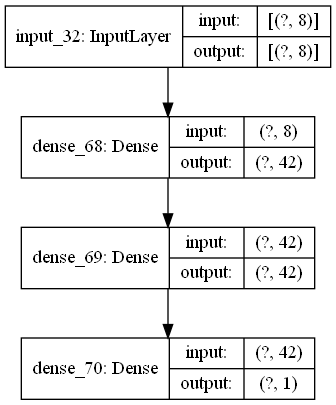

In [74]:
tf.keras.utils.plot_model(model, "random_search_model.png", show_shapes=True)

如上输出所示，通过随机搜索，得到最佳隐层数目为2，最佳神经元个数为42，最佳学习率为0.0033。<br>
可以用于超参数优化的Python库：
- Hyperopt：可优化各种复杂的搜索空间（包括诸如学习率的实数值和诸如层数的离散值）
- Hyperas、kopt和Talos：用于Keras模型的超参数优化，前两个是基于Hyperopt的
- Keras Tuner：由Google开发的用于Keras模型超参数优化库，提供了可视化和分析的托管服务
- Scikit-Optimize (skopt)：通用的优化库。
- Spearmint：一款贝叶斯优化库。
- Hyperband：速度快。
- Sklearn-Deap：一款基于进化算法的超参数优化库。

### 隐藏层数量与隐藏层神经元数量

大部分情况下，可以先从一至两个隐藏层开始尝试，对于复杂问题，可以慢慢增加隐藏层数目直到开始发生过拟合，对于非常复杂的问题，例如大型图像分类或语音识别，可能需要几十甚至上百的隐藏层（但通常可能不需要全连接，因为参数太多）

- 没有隐藏层：仅能够表示线性可分函数或决策
- 隐藏层数=1：可以拟合任何“包含从一个有限空间到另一个有限空间的连续映射”的函数
- 隐藏层数=2：搭配适当的激活函数可以表示任意精度的任意决策边界，并且可以拟合任何精度的任何平滑映射
- 隐藏层数>2：多出来的隐藏层可以学习复杂的描述（某种自动特征工程）
<br>层数越深，理论上拟合函数的能力增强，效果按理说会更好，但是实际上更深的层数可能会带来过拟合的问题，同时也会增加训练难度，使模型难以收敛。因此我的经验是，在使用BP神经网络时，最好可以参照已有的表现优异的模型，如果实在没有，则根据上面的表格，从一两层开始尝试，尽量不要使用太多的层数。在CV、NLP等特殊领域，可以使用CNN、RNN、attention等特殊模型，不能不考虑实际而直接无脑堆砌多层神经网络。尝试迁移和微调已有的预训练模型，能取得事半功倍的效果。

通常，对所有隐藏层使用相同数量的神经元就足够了。对于某些数据集，拥有较大的第一层并在其后跟随较小的层将导致更好的性能，因为第一层可以学习很多低阶的特征，这些较低层的特征可以馈入后续层中，提取出较高阶特征。<br>
需要注意的是，与在每一层中添加更多的神经元相比，添加层层数将获得更大的性能提升。因此，不要在一个隐藏层中加入过多的神经元。<br>
- 隐藏神经元的数量应在输入层的大小和输出层的大小之间。
- 隐藏神经元的数量应为输入层大小的2/3加上输出层大小的2/3。
- 隐藏神经元的数量应小于输入层大小的两倍。
总而言之，隐藏层神经元是最佳数量需要自己通过不断试验获得，建议从一个较小数值比如1到5层和1到100个神经元开始，如果欠拟合然后慢慢添加更多的层和神经元，如果过拟合就减小层数和神经元。此外，在实际过程中还可以考虑引入Batch Normalization(批标准化, 和普通的数据标准化类似, 是将分散的数据统一的一种做法, 也是优化神经网络的一种方法), Dropout(在深度学习网络的训练过程中，对于神经网络单元，按照一定的概率将其暂时从网络中丢弃), 正则化等降低过拟合的方法。

![test](image/11.png)

### 学习率、批量大小及其他超参

1. 学习率：学习率是最重要的超参数，一般情况下最佳的学习率是最大学习率的一半。（取决于其他超参，尤其是批量大小，因此修改了任意超参要更新学习率）
2. 优化器：选择一个好的优化器也非常重要。
3. 批大小：批大小对训练时间有重要影响，较大的批大小在训练开始时可能造成不稳定，同时最终的模型可能泛化性比批大小比较小的差。
4. 激活函数：基本上ReLU最好。
5. 迭代次数：基本不用太需要调整，只需要使用Early stopping就好了。

- 学习率<br>
首先我们需要知道，学习率(learn_rate)是来更新网络模型拓扑结构中参数的，那么最佳的学习率(learn_rate),肯定是和网路模型拓扑结构有关，不同的神经网络模型，对应着自己最佳的学习率。<br>
Jeremy Howard(kaggle 冠军) 博主提供率一种思路：
我们初始化一个非常小的学习率（learn_rate）我们可以通过一个简单的实验来观察这一点，在每个小批量之后，我们逐渐提高学习率，记录每次增量的损失。这种逐步增长可以是线性地，也可以是指数级的<br>
![test](image/13.png)
如上图所展现的，如果learn_rate 太小，loss会收敛，但幅度很小，并且未出现大的振幅。当learn_rate进入最佳学习率区域时，您将看到损失函数(loss)快速下降，并且未出现大的振幅。进一步提高学习率(learn_rate),loss会收敛，但是出现振幅，并随着学习率的进一步增大，振幅越来越大，因为参数更新会导致损失“反弹”，甚至偏离最小值。记住，最好的学习率与损失的最大下降有关，所以我们主要对分析图的斜率感兴趣。<br>

- 优化器
解决优化问题，有很多算法（最常见的就是梯度下降），这些算法也可以用于优化神经网络。每个深度学习库中，都包含了大量的优化算法，用于优化学习速率，让网络用最快的训练次数达到最优，还能防止过拟合。<br>
keras中就提供了这样一些优化器：<br>
 - SGD：随机梯度下降
 - SGD+Momentum: 基于动量的SGD（在SGD基础上做过优化）
 - SGD+Nesterov+Momentum：基于动量，两步更新的SGD（在SGD+Momentum基础上做过优化）
 - Adagrad：自适应地为各个参数分配不同学习速率
 - Adadelta： 针对Adagrad问题，优化过的算法（在Adagrad基础上做过优化）
 - RMSprop：对于循环神经网络（RNNs）是最好的优化器（在Adadelta基础上做过优化）
 - Adam：对每个权值都计算自适应的学习速率（在RMSprop基础上做过优化）
 - Adamax：针对Adam做过优化的算法（在Adam基础上做过优化）

- 如何选择:
 - 如果你的数据输入量很小，那就选一种自适应学习速率的方法。这样你就不用对学习速率进行调优，因为你的数据本来就小，NN学习耗时也小。这种情况你更应该关心网络分类的准确率。
 - RMSprop, Adadelta, 和 Adam 非常相似，在相同的情况下表现都很好。
 - 偏置校验让Adam的效果稍微比RMSprop好一点
 - 进行过很好的参数调优的SGD+Momentum算法效果好于Adagrad/Adadelta

- batchsize(批大小)
batchsize：一次训练的样本数目<br>
对于图片数据，一般输入的数据格式为 （样本数，图片长，图片宽，通道数），样本数也就是批大小。<br>
增大批大小，处理速度会加快，训练的振动幅度减小，更容易收敛，同时所需的内存容量增加。<br>
批大小太小会难以收敛（容易理解，不同数据之间差异可能比较大，批次太小的话，适合了这个批次却不适合下一个批次，所以一直震荡难以收敛）